# Import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import datetime as dt
from tqdm.notebook import tqdm

# Import data

In [2]:
data = pd.read_csv("data/price.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,YUM,Z,ZBH,ZBRA,ZG,ZI,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,3.217068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,3.187954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,3.187954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,3.246180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,3.289852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,128.880005,26.809999,13.35,55.630001,189.429993,144.149994,NaN,133.699997,105.190002,81.989998,...,125.650002,44.090000,116.889999,239.369995,42.330002,14.71,38.680000,68.160004,198.259995,182.119995
2023-12-05,127.879997,25.240000,13.13,53.160000,193.419998,144.570007,NaN,133.710007,104.349998,81.849998,...,124.379997,44.290001,115.820000,234.360001,42.520000,14.48,37.389999,68.720001,198.910004,179.649994
2023-12-06,128.910004,25.120001,13.48,55.160000,192.320007,146.380005,NaN,135.309998,104.940002,79.970001,...,124.809998,45.090000,116.129997,234.130005,43.490002,15.50,37.150002,70.940002,197.910004,182.000000


In [3]:
cats = pd.read_csv("data/categorical.csv")
cats = cats.set_index("Unnamed: 0")
cats = cats.rename_axis(None, axis = 0)
cats

,AAPL,MSFT,GOOGL,GOOG,AMZN,BRK.B,UNH,JNJ,XOM,V,...,UPST,TAP,WE,CVNA,NVAX,EHAB,OPEN,UWMC,MBC,FG
sectors,Information Technology,Information Technology,Communication Services,Communication Services,Consumer Discretionary,Financials,Health Care,Health Care,Energy,Information Technology,...,Financials,Consumer Staples,Real Estate,Consumer Discretionary,Health Care,Health Care,Real Estate,Financials,Industrials,Financials


In [4]:
features = pd.read_csv("data/features.csv")
features["Date"] = pd.to_datetime(features["Date"])
features = features.set_index("Date")

# Subtract 1 year from index of features since we want to see the correlation between price and the value of the feature 1 year ago from the date of the stock price (since we are predicting stock price after one year)
features.index = [index - dt.timedelta(days=365) for index in features.index]
features

,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,Manufacturing hourly earnings,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
1989-01-01,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-02,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-03,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-04,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-05,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796
2021-12-24,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796
2021-12-25,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796
2021-12-26,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796


# Check amount of stock price data per date

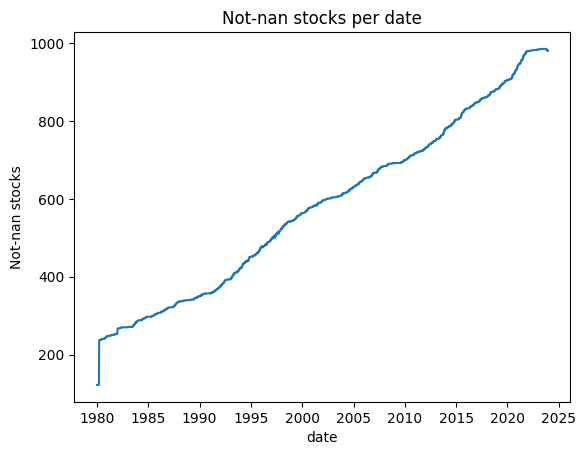

In [5]:
notnan = []
for i in range(len(data)):
    notnan.append(data.shape[1] - data.iloc[i,:].isna().sum())

plt.plot(data.index, notnan)
plt.title("Not-nan stocks per date")
plt.xlabel("date")
plt.ylabel("Not-nan stocks");

# Stock price over time of all stocks

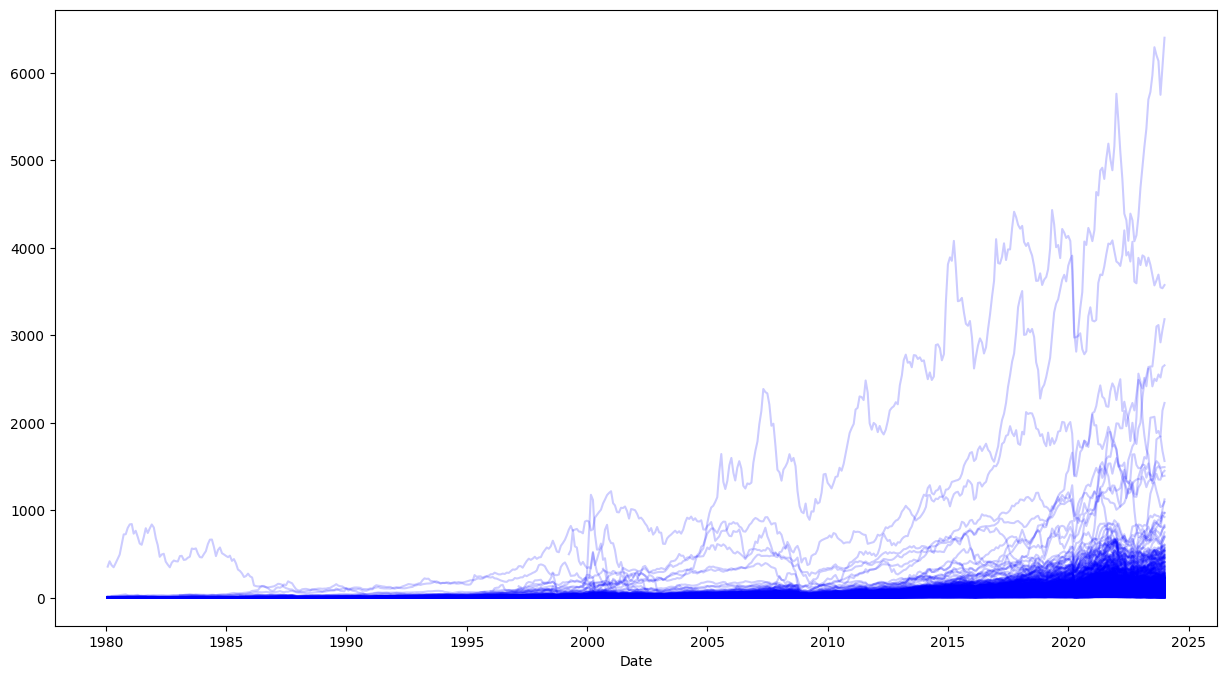

In [6]:
price_monthly_resampling = data.resample("1M").mean()

plt.figure(figsize=(15,8))
sns.lineplot(data=price_monthly_resampling, legend=False, palette=['b']*price_monthly_resampling.shape[1], dashes=False, alpha=0.2);

# Line plots

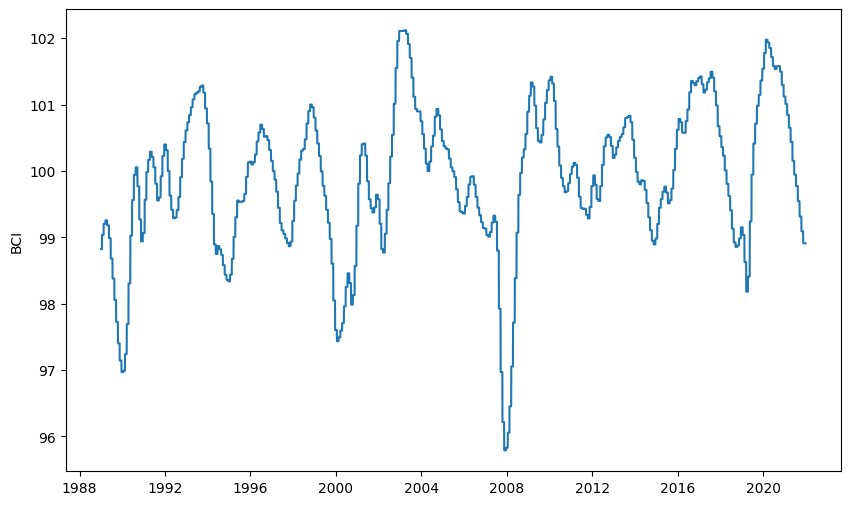

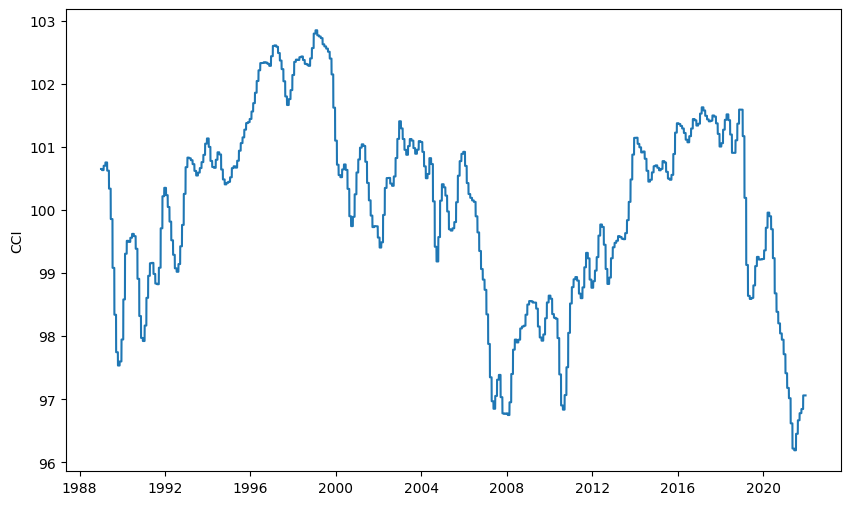

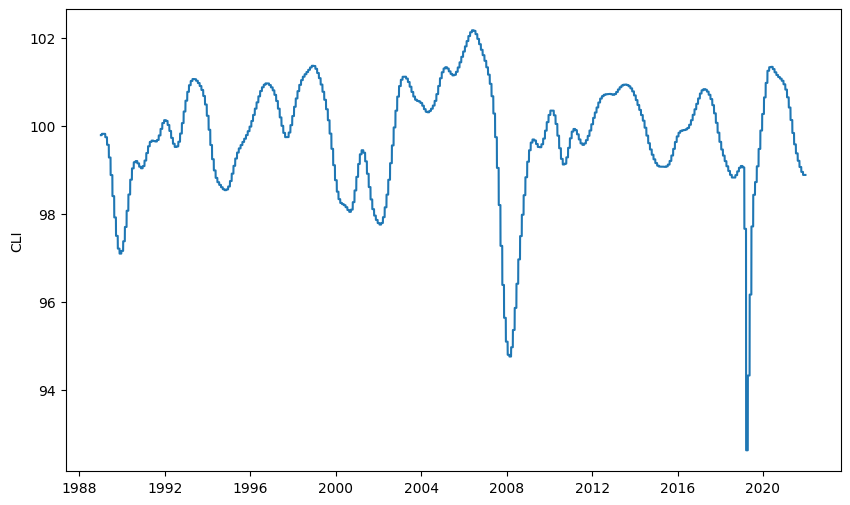

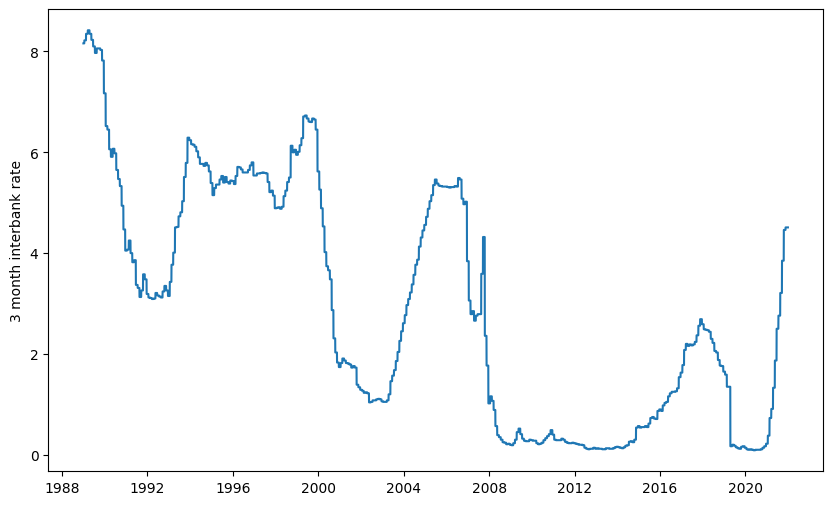

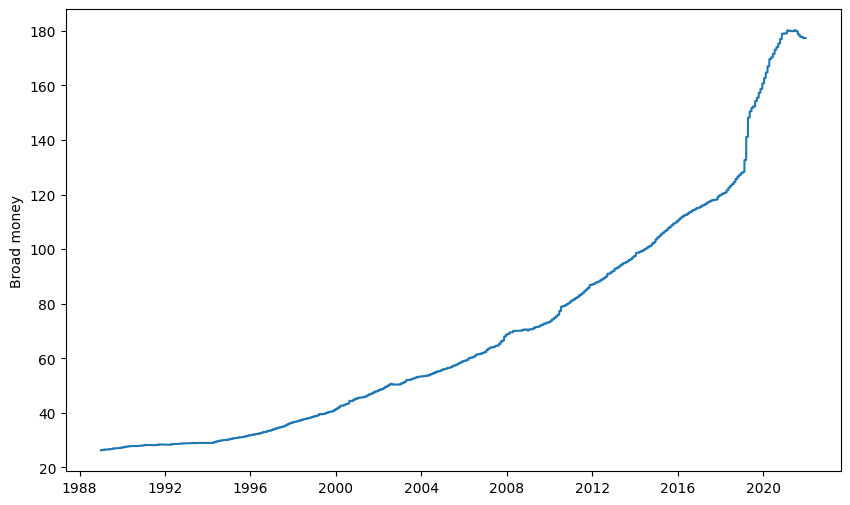

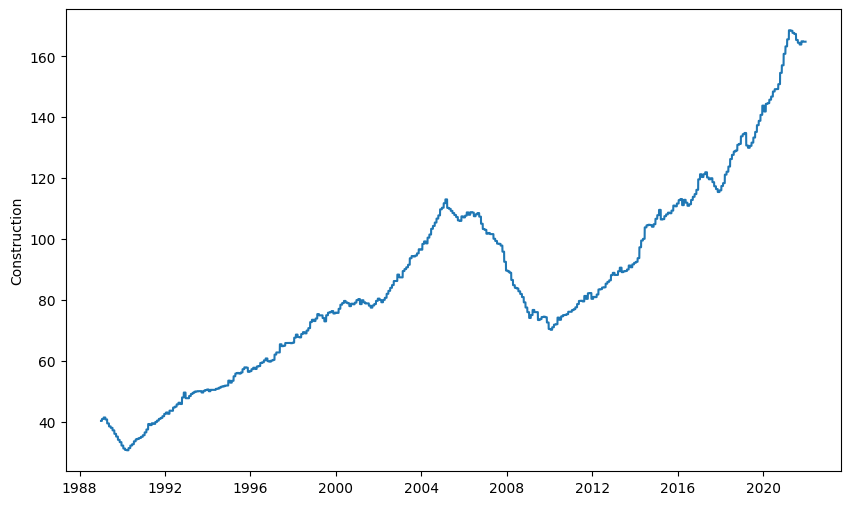

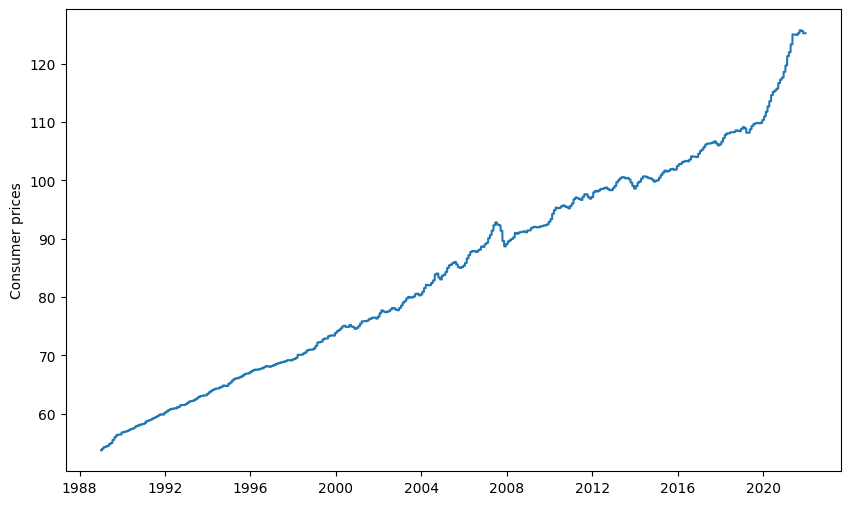

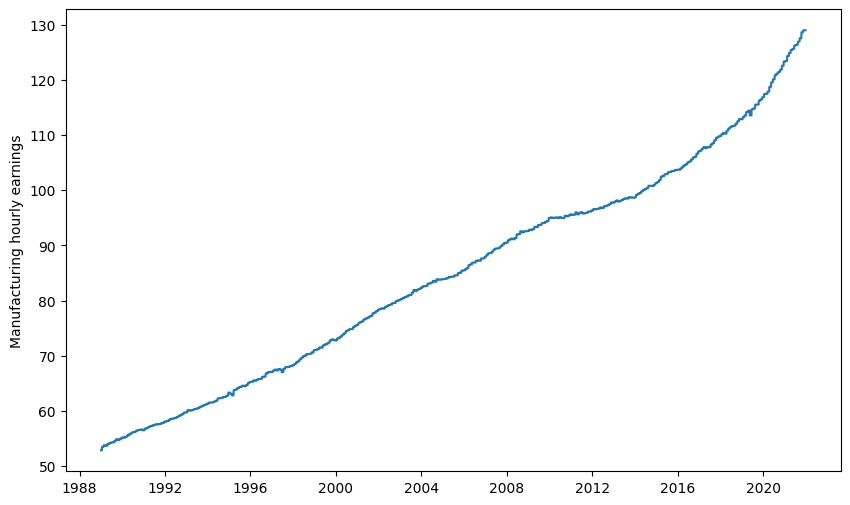

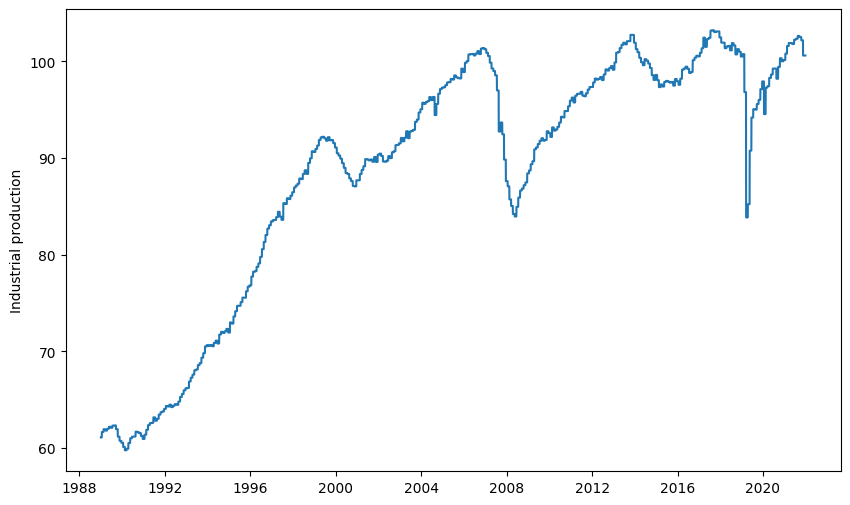

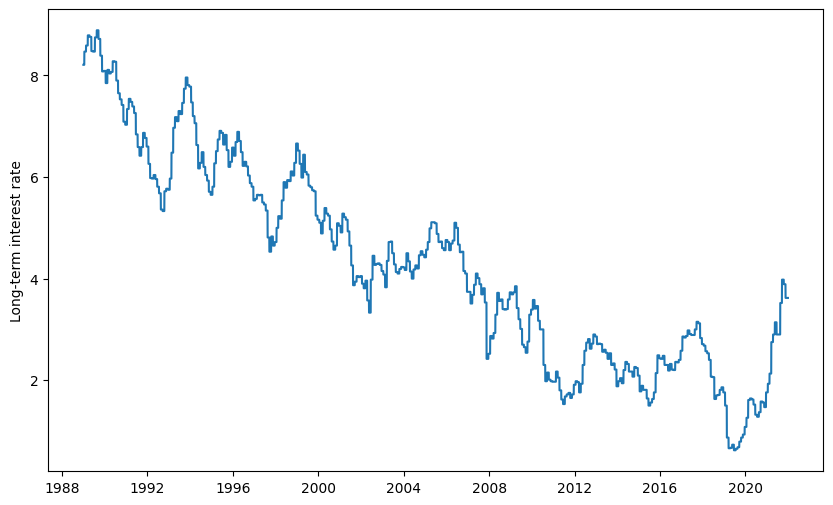

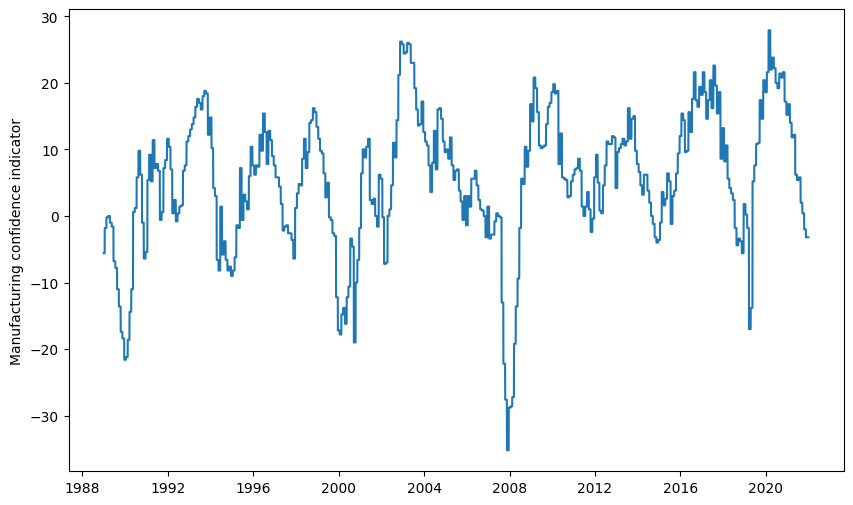

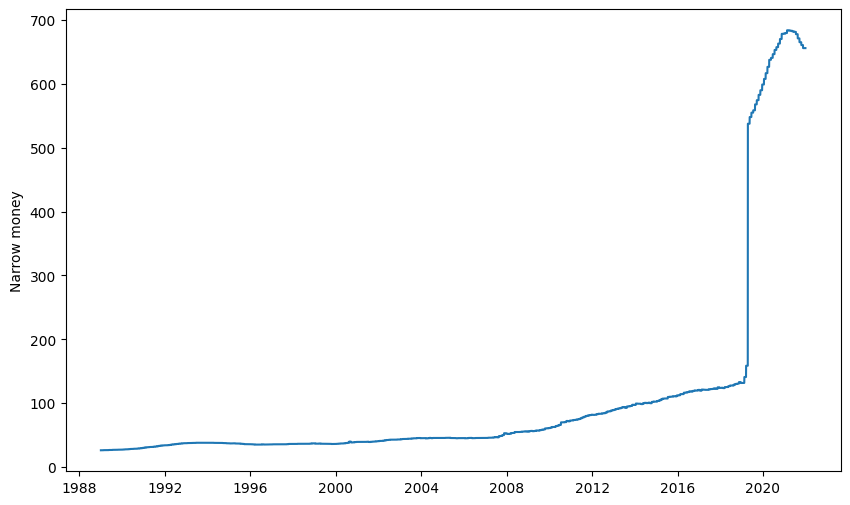

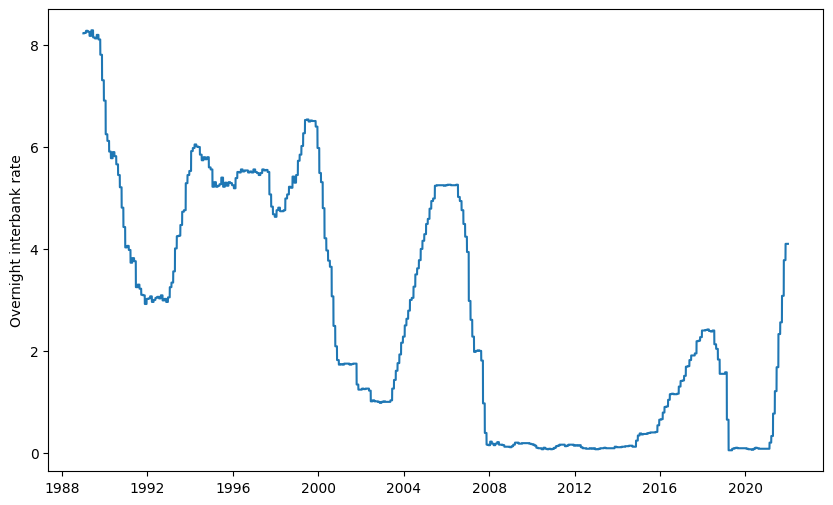

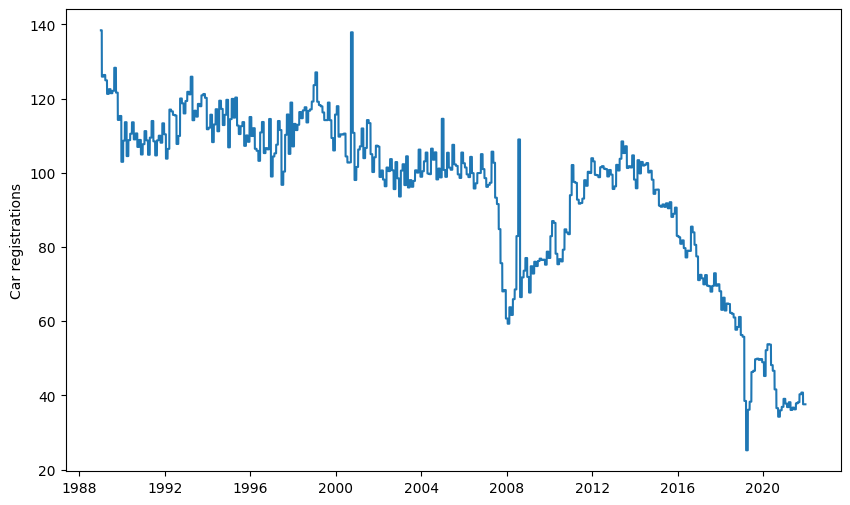

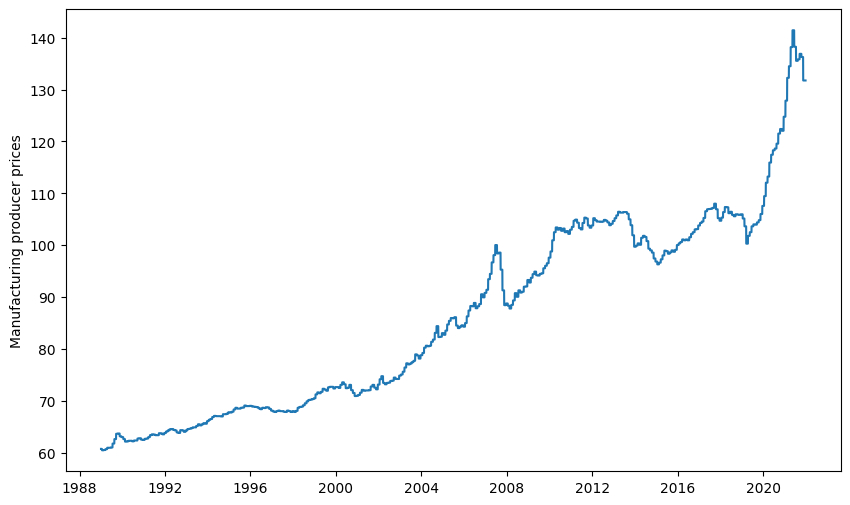

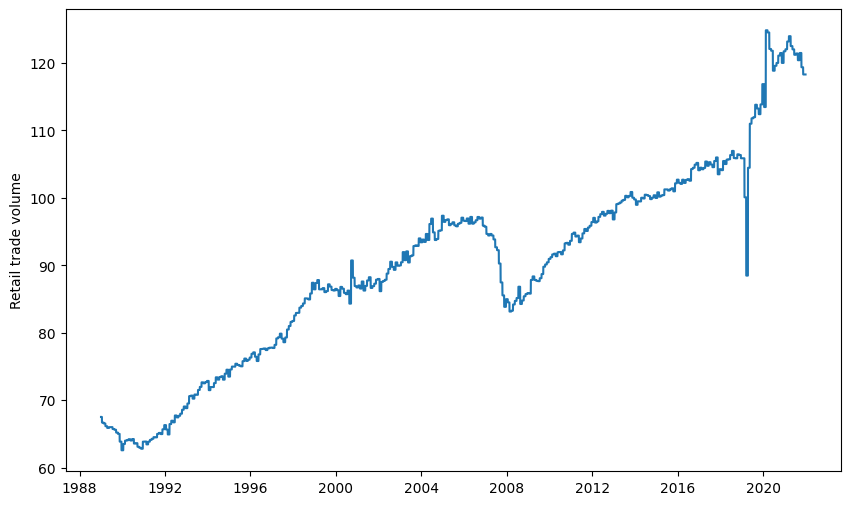

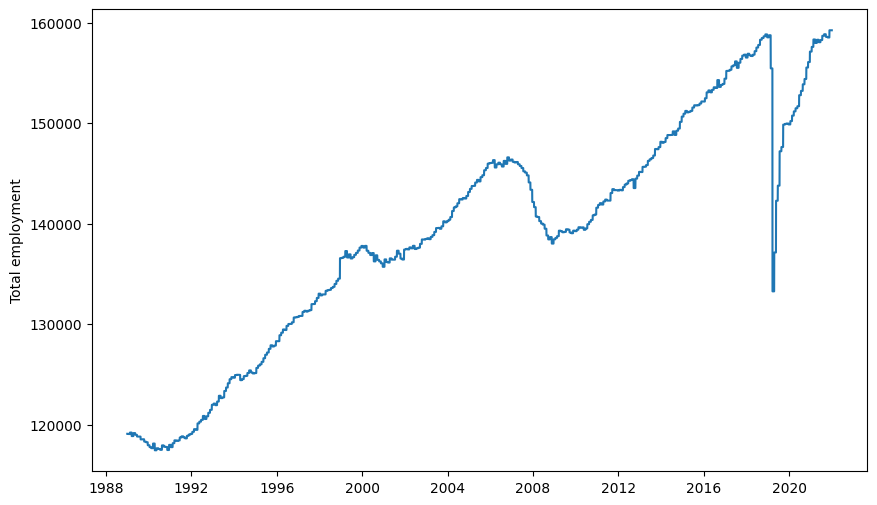

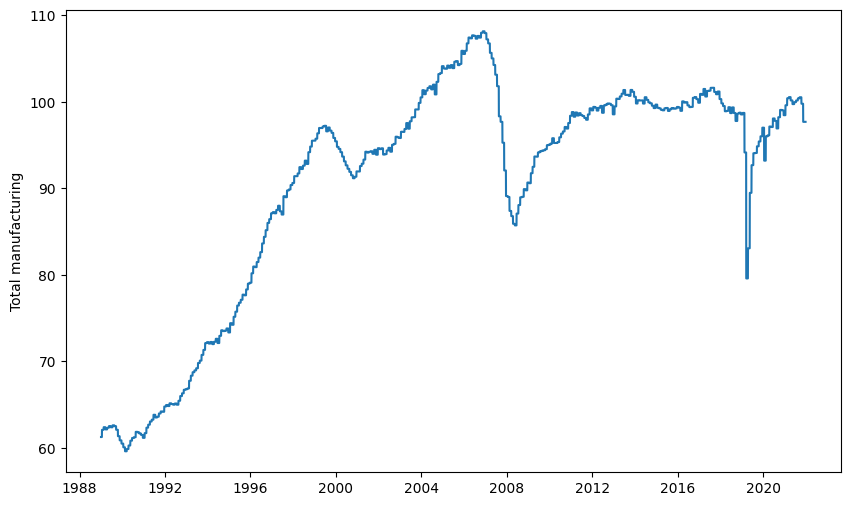

In [7]:
for feature in features:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=features, x=features.index, y=feature)
    plt.show()

# Correlation matrix between features

In [8]:
def plot_correlation_matrix_of_df(df, columns_order, annot = True):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe'''
    # Sort columns based on column column name
    df = df[columns_order]

    # Calculate correlation matrix
    corrs = df.corr().round(2)
    
    # Since this is a symmetric table, set up a mask so that we only plot values below the main diagonal.
    mask = np.triu(np.ones_like(corrs, dtype=bool))
    f, ax = plt.subplots(figsize=(10, 8)) # Initialise the plots and axes

    # Plot the correlations as a seaborn heatmap, with a colourbar.
    sns.heatmap(corrs, mask=mask, center=0, annot=annot, square=True, linewidths=.5, cmap="seismic", vmin = -1, vmax = 1)

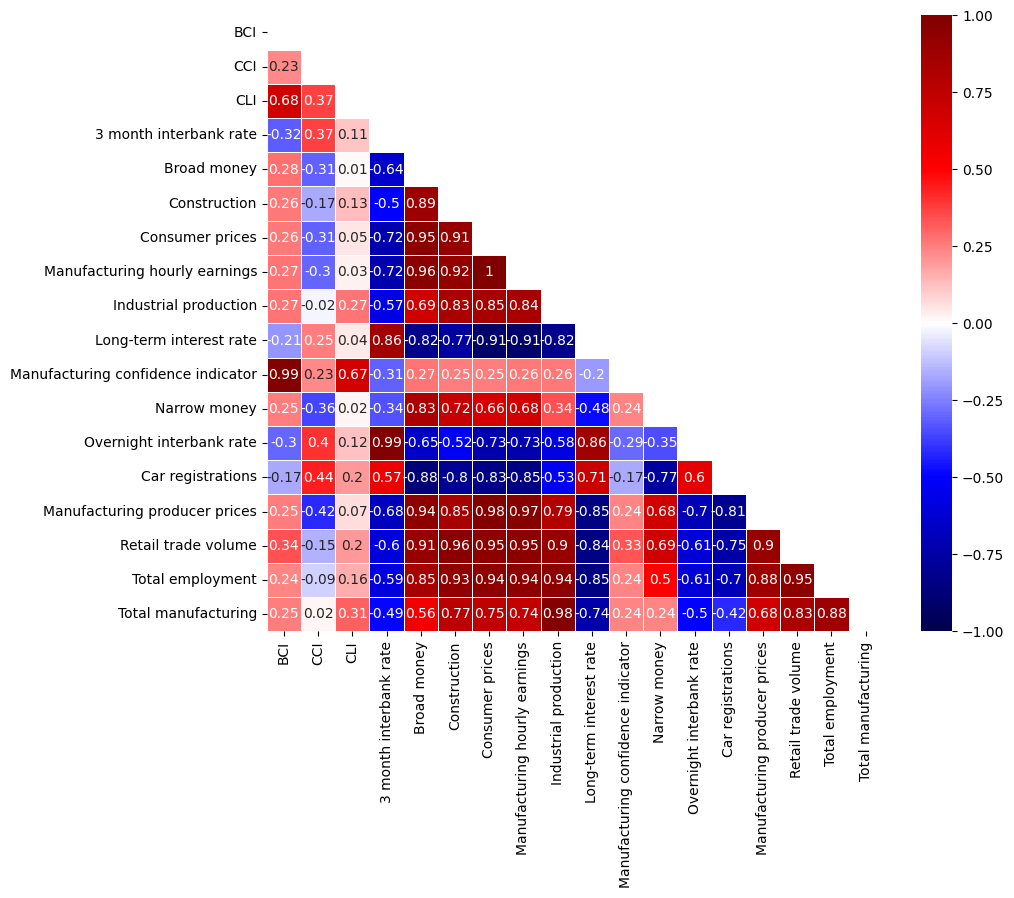

In [9]:
plot_correlation_matrix_of_df(features, features.columns,annot = True)

# Relationship between features and stock price

## Data manipulation

In [10]:
data['Date'] = data.index

In [11]:
data_melted = data.melt(id_vars=['Date']).set_index('Date')
data_melted.columns = ["stock", "price"]
data_melted

,stock,price
Date,,
1980-01-02,A,NaN
1980-01-03,A,NaN
1980-01-04,A,NaN
1980-01-07,A,NaN
1980-01-08,A,NaN
...,...,...
2023-12-04,ZTS,182.119995
2023-12-05,ZTS,179.649994
2023-12-06,ZTS,182.000000


In [12]:
# Remove all rows where price is nan
data_melted = data_melted.dropna(subset=['price'])
data_melted

,stock,price
Date,,
1999-11-18,A,26.740845
1999-11-19,A,24.537762
1999-11-22,A,26.740845
1999-11-23,A,24.309856
1999-11-24,A,24.955589
...,...,...
2023-12-04,ZTS,182.119995
2023-12-05,ZTS,179.649994
2023-12-06,ZTS,182.000000


In [13]:
sector = []
for s in data_melted["stock"]:
    sector.append(cats[s][0])

data_melted["sector"] = sector
data_melted

C:\Users\brarn\AppData\Local\Temp\ipykernel_6632\939220257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_melted["sector"] = sector


,stock,price,sector
Date,,,
1999-11-18,A,26.740845,Health Care
1999-11-19,A,24.537762,Health Care
1999-11-22,A,26.740845,Health Care
1999-11-23,A,24.309856,Health Care
1999-11-24,A,24.955589,Health Care
...,...,...,...
2023-12-04,ZTS,182.119995,Health Care
2023-12-05,ZTS,179.649994,Health Care
2023-12-06,ZTS,182.000000,Health Care


In [14]:
data_melted[features.columns] = np.full((len(data_melted), len(features.columns)), np.nan)
data_melted

C:\Users\brarn\AppData\Local\Temp\ipykernel_6632\630380220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_melted[features.columns] = np.full((len(data_melted), len(features.columns)), np.nan)
C:\Users\brarn\AppData\Local\Temp\ipykernel_6632\630380220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_melted[features.columns] = np.full((len(data_melted), len(features.columns)), np.nan)
C:\Users\brarn\AppData\Local\Temp\ipykernel_6632\630380220.py:1: SettingWithCopyWarning: 
A value is trying 

,stock,price,sector,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,...,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,A,26.740845,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-19,A,24.537762,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-22,A,26.740845,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-23,A,24.309856,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-24,A,24.955589,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,ZTS,182.119995,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-05,ZTS,179.649994,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06,ZTS,182.000000,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dates_in_data_melted = set(data_melted.index)
for date in tqdm(features.index):
    if date in dates_in_data_melted:
        try:
            data_melted.loc[date,"BCI":] = features.loc[date,:].values
        except KeyError:
            pass

data_melted

  0%|          | 0/12049 [00:00<?, ?it/s]

,stock,price,sector,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,...,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,A,26.740845,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-19,A,24.537762,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-22,A,26.740845,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-23,A,24.309856,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-24,A,24.955589,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,ZTS,182.119995,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-05,ZTS,179.649994,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06,ZTS,182.000000,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating plot

In [17]:
data_melted

,stock,price,sector,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,...,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,A,26.740845,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-19,A,24.537762,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-22,A,26.740845,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-23,A,24.309856,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-24,A,24.955589,Health Care,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,ZTS,182.119995,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-05,ZTS,179.649994,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06,ZTS,182.000000,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Unfortunately, it takes too much time to create the plot if the dataframe is not resampled to monthly
data_melted = data_melted.drop(columns=["stock", "sector"])
data_melted = data_melted.resample("1M").mean()
data_melted

,price,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,Manufacturing hourly earnings,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,
1980-01-31,4.480616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,4.991833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,3.343967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,2.724848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,2.970841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,140.519419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-30,138.223200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-31,132.665197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Identify the columns to include in the dropdown menu
x_features = data_melted.columns[1:]

# Create the scatter plot
fig = px.scatter(data_melted, 
                 x=x_features[0],  # Initial x-axis feature
                 y='price', 
                 title='Stock Price vs. Economic Indicators')

# Update layout to add dropdown menu for selecting x-axis feature
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[dict(method='restyle',
                          label=feature,
                          args=[{'x': [data_melted[feature]]}]) for feature in x_features],
            direction='down',
            showactive=True,
        )
    ]
)

# Show the figure
fig.show()